In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
## groundtruth
gt = pd.read_csv('GroundTruth.txt', sep=" ", header=None)

## adaboost prediction
adaboosts = [None]

for t in range(1, 11):
    adaboosts.append(pd.read_csv(f'Adaboost_pred_{t}.txt', sep=" ", header=None))

# ## yolo prediction
# yolo_3 = pd.read_csv('Yolov5_pred_3.txt', sep=" ", header=None)
# yolo_4 = pd.read_csv('Yolov5_pred_4.txt', sep=" ", header=None)
# yolo_5 = pd.read_csv('Yolov5_pred_5.txt', sep=" ", header=None)

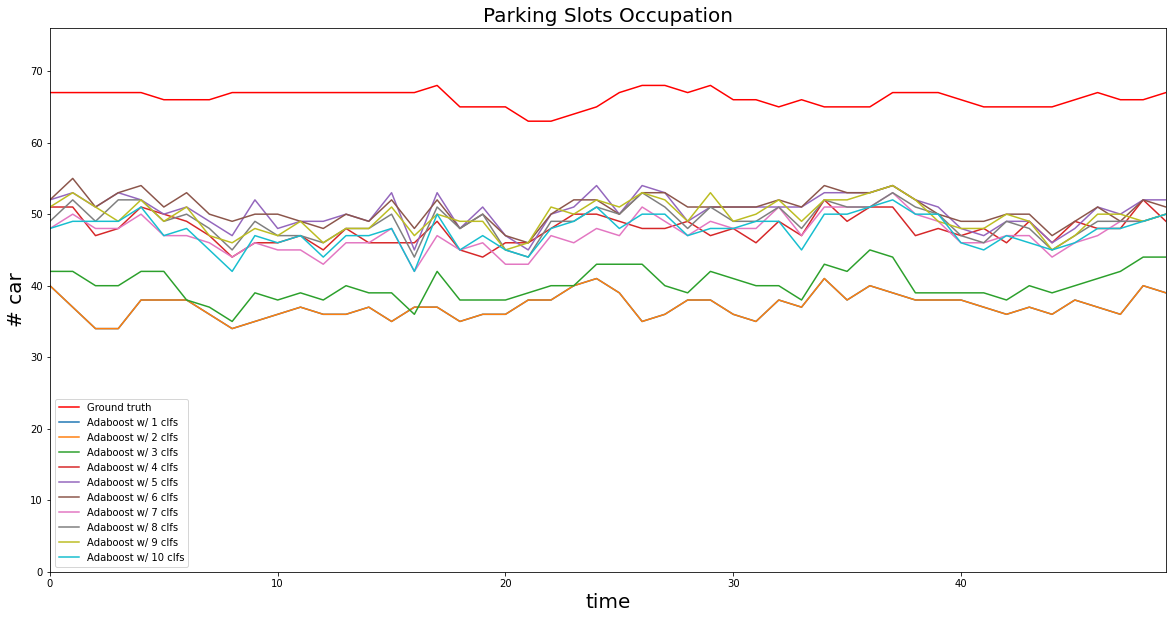

In [17]:
gt_sum = gt.sum(axis = 1)

plt.figure(figsize=(20, 10))

plt.plot(gt_sum, label='Ground truth', color='red')
for t in range(1, 11):
    plt.plot(adaboosts[t].sum(axis=1), label=f"Adaboost w/ {t} clfs")


plt.xlabel('time', fontsize=20)
plt.ylabel('# car', fontsize=20)
plt.xlim((0,49))
plt.ylim((0,76))
plt.title('Parking Slots Occupation', fontsize=20)
plt.legend(fontsize=10)
plt.savefig('Parking_Slots_Occupation.png')
plt.show()

Average acc. for 1: 0.5084210526315788
Average acc. for 2: 0.5084210526315788
Average acc. for 3: 0.5228947368421051
Average acc. for 4: 0.610526315789474
Average acc. for 5: 0.6315789473684214
Average acc. for 6: 0.6357894736842108
Average acc. for 7: 0.5947368421052632
Average acc. for 8: 0.6131578947368422
Average acc. for 9: 0.6247368421052634
Average acc. for 10: 0.5971052631578947


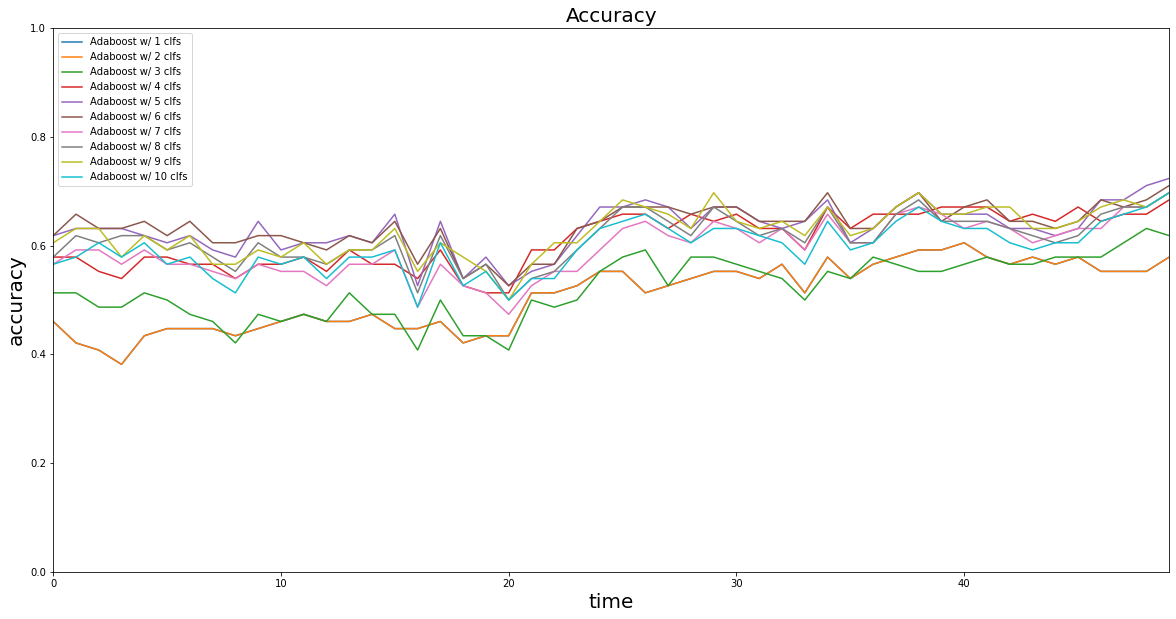

In [20]:
def get_accuracy(df):
    return np.sum(np.equal(gt, df), axis=1) / gt.shape[1]

plt.figure(figsize=(20, 10))

for t in range(1, 11):
    res = get_accuracy(adaboosts[t])
    print(f"Average acc. for {t}: {np.mean(res)}")
    plt.plot(get_accuracy(adaboosts[t]), label=f"Adaboost w/ {t} clfs")


plt.xlabel('time', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.xlim((0,49))
plt.ylim((0,1))
plt.title('Accuracy', fontsize=20)
plt.legend(fontsize=10)
plt.savefig('Accuracy.png')
plt.show()

Average F1-score for 1: 0.6381559559880625
Average F1-score for 2: 0.6381559559880625
Average F1-score for 3: 0.6582614423955107
Average F1-score for 4: 0.7402506591527274
Average F1-score for 5: 0.7592525480337945
Average F1-score for 6: 0.7628020913436658
Average F1-score for 7: 0.7279383145893812
Average F1-score for 8: 0.7441075201016164
Average F1-score for 9: 0.753191759037488
Average F1-score for 10: 0.7303236634256227


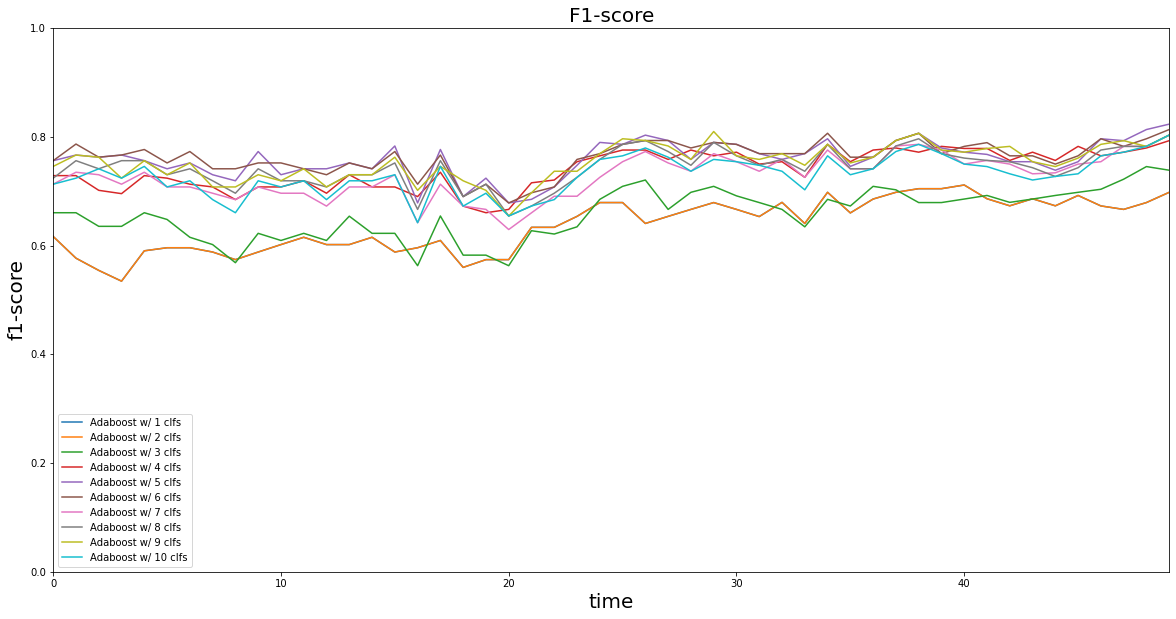

In [21]:
def get_accuracy(df):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    res = []

    for j in range(gt.shape[0]):
        for i in range(gt.shape[1]):
            if df[i][j]:
                if gt[i][j]:
                    tp += 1
                else:
                    fp += 1
            else:
                if gt[i][j]:
                    fn += 1
                else:
                    tn += 1
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        res.append(2 * (precision * recall) / (precision + recall))
        tp = 0
        tn = 0
        fp = 0
        fn = 0
    return res

plt.figure(figsize=(20, 10))

for t in range(1, 11):
    res = get_accuracy(adaboosts[t])
    print(f"Average F1-score for {t}: {np.mean(res)}")
    plt.plot(res, label=f"Adaboost w/ {t} clfs")


plt.xlabel('time', fontsize=20)
plt.ylabel('f1-score', fontsize=20)
plt.xlim((0,49))
plt.ylim((0,1))
plt.title('F1-score', fontsize=20)
plt.legend(fontsize=10)
plt.savefig('F1-score.png')
plt.show()